## Observations and Insights 

In [405]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files (I did something janky with Git/Github and had to 
#patch the files into an upload/download situation and so the names are weird.)

mouse_metadata_path = "05-Matplotlib_Homework_Instructions_Pymaceuticals_data_Mouse_metadata.csv"
study_results_path = "05-Matplotlib_Homework_Instructions_Pymaceuticals_data_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata_df=pd.DataFrame(mouse_metadata)
study_results_df=pd.DataFrame(study_results)

# Combine the data into a single dataset

combined_df = pd.merge(study_results_df, mouse_metadata_df, on="Mouse ID", how="left")



# Display the data table for preview
combined_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [268]:
# Checking the number of mice.
unique_mice=combined_df['Mouse ID'].unique()
unique_mice_df=pd.DataFrame(unique_mice)
unique_mice_df


,0
0,b128
1,f932
2,g107
3,a457
4,c819
...,...
244,t565
245,i557
246,m957
247,f966


In [269]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate_mice=combined_df.groupby(['Mouse ID', "Timepoint"])
#duplicate_mice_df=pd.DataFrame(duplicate_mice)

#duplicate_mice_df

duplicate_mouse = combined_df.loc[combined_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"]
duplicate_mouse


137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [270]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data=combined_df[combined_df["Mouse ID"]=='g989']
duplicate_mouse_data

#i'm a bit worried about all this NaN business happening here...is this a problem with the merging of the data frames? Should I
#have used inner join instead of append? NM. I went back and used the inner join and now my data populated. 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [271]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data_df=combined_df[combined_df["Mouse ID"]!='g989']

clean_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [272]:
final_clean_data_df =clean_data_df[clean_data_df['Mouse ID'].isin(duplicate_mouse_data)==False]
final_clean_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [273]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_data_df['Mouse ID'].unique()
clean_mice_df=pd.DataFrame(clean_mice)
clean_mice_df



,0
0,b128
1,f932
2,g107
3,a457
4,c819
...,...
243,t565
244,i557
245,m957
246,f966


In [274]:
final_clean_data_df


final_clean_data_mice_drugs=final_clean_data_df[["Mouse ID", "Drug Regimen"]]

final_clean_data_mice_drugs=pd.DataFrame(final_clean_data_mice_drugs)
final_clean_data_mice_drugs


final_clean_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary Statistics

In [275]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



summary_statistics_df=clean_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"].rename("Mean Tumor Volume")
summary_statistics_df=pd.DataFrame(summary_statistics_df)

summary_statistics_df["Median Tumor Volume"]=clean_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]


summary_statistics_df["Tumor Volume Variance"]=clean_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]


summary_statistics_df["Tumor Volume Std.Dev."]=clean_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]


summary_statistics_df["Tumor Volume Std.Err."]=clean_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [226]:
# clean_data_narrowed_df=clean_data_df.drop(["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
# clean_data_narrowed_df

In [277]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#del clean_data_df["Age_months"]
#del clean_data_df["Timepoint"]
#del clean_data_df["Metastatic Sites"]

summary_statistics_df_agg=clean_data_df.groupby("Drug Regimen").agg(['mean','median', 'var', 'std', 'sem'])

summary_statistics_df_agg


#This table shows the correct values, but I got here by using <del> and just chucking the column names that were 
#messing things up.Should I go back and make another dataframe with only one x-axis value ("Tumor Volume(mm3)") and 
#build the agg from there? I tried in the code above and it didn't work so well (now commented out). 

Timepoint                                          \
                   mean median         var        std       sem   
Drug Regimen                                                      
Capomulin     21.565217     20  206.928043  14.384994  0.948518   
Ceftamin      19.747191     20  204.031772  14.283969  1.070629   
Infubinol     18.174157     15  181.534470  13.473473  1.009879   
Ketapril      19.707447     20  196.839089  14.029935  1.023238   
Naftisol      19.623656     20  201.208951  14.184814  1.040081   
Placebo       18.674033     15  192.954266  13.890798  1.032495   
Propriva      17.060811     15  187.050699  13.676648  1.124214   
Ramicane      21.425439     20  203.796178  14.275720  0.945433   
Stelasyn      19.226519     20  191.620626  13.842710  1.028921   
Zoniferol     19.368132     15  206.918979  14.384679  1.066263   

             Tumor Volume (mm3)                                            \
                           mean     median        var       std       sem   
Drug Regimen                                                                
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346   
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821   
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236   
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860   
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466   
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331   
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332   
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955   
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111   
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398   

              ... Age_months                                       Weight (g)  \
              ...       mean median        var       std       sem       mean   
Drug Regimen  ...                                                               
Capomulin     ...  13.456522   16.5  59.620372  7.721423  0.509136  19.965217   
Ceftamin      ...  13.247191   12.0  65.147591  8.071406  0.604977  27.398876   
Infubinol     ...  16.230337   20.0  56.404272  7.510278  0.562919  27.196629   
Ketapril      ...  15.659574   18.0  36.236432  6.019670  0.439030  27.861702   
Naftisol      ...  12.000000    9.0  45.102703  6.715855  0.492430  27.166667   
Placebo       ...  10.734807   10.0  40.384837  6.354907  0.472356  27.928177   
Propriva      ...  10.006757    7.5  48.251655  6.946341  0.570986  27.135135   
Ramicane      ...  10.684211    9.0  35.362393  5.946629  0.393825  19.679825   
Stelasyn      ...  12.784530   14.0  63.036648  7.939562  0.590143  27.856354   
Zoniferol     ...  12.598901   12.5  33.479115  5.786114  0.428895  27.692308   

                                                    
             median        var       std       sem  
Drug Regimen                                        
Capomulin      20.5   7.466034  2.732404  0.180169  
Ceftamin       28.0   2.501016  1.581460  0.118535  
Infubinol      27.0   4.769028  2.183810  0.163684  
Ketapril       28.0   3.392536  1.841884  0.134333  
Naftisol       27.0   2.247748  1.499249  0.109930  
Placebo        28.0   3.378146  1.837973  0.136615  
Propriva       26.0   2.933995  1.712891  0.140799  
Ramicane       19.0  10.465318  3.235014  0.214244  
Stelasyn       28.0   2.701473  1.643616  0.122169  
Zoniferol      28.0   2.015300  1.419612  0.105229  

[10 rows x 25 columns]

## Bar and Pie Charts

<AxesSubplot:>

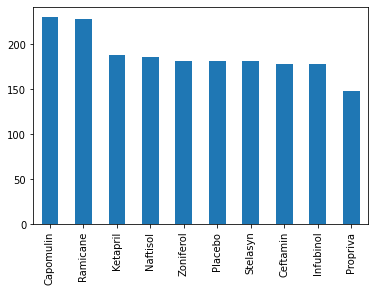

In [278]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.


#Why is this only returning two of the drug regimens? What happened to the data?

'''
clean_mice_drugs=clean_data_df['Mouse ID'].unique()
clean_mice_drugs_df=pd.DataFrame(clean_mice_drugs)
clean_mice_drugs_df["Drug Regimen"]=clean_data_df["Drug Regimen"]
clean_mice_drugs_df
'''


# clean_mice_drugs_df.head(50)

mouse_drug_counts=clean_data_df["Drug Regimen"].value_counts()
mouse_drug_counts.plot.bar()
# mouse_drug_counts=pd.DataFrame(mouse_drug_counts)

# mouse_drug_counts

In [279]:
mouse_drug_counts=mouse_drug_counts.reset_index()
mouse_drug_counts

,index,Drug Regimen
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Placebo,181
6,Stelasyn,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,148


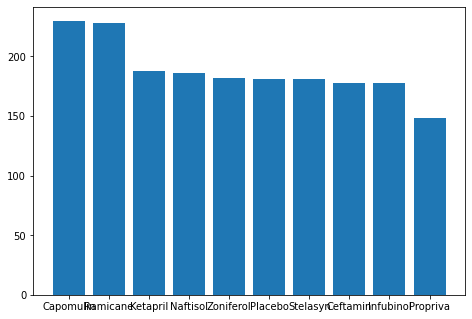

In [280]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
drugs = mouse_drug_counts["index"]
mice = mouse_drug_counts["Drug Regimen"]
ax.bar(drugs,mice)
plt.show()


        Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
Sex                                                                 
Female       922        922                 922               922   
Male         958        958                 958               958   

        Drug Regimen  Age_months  Weight (g)  
Sex                                           
Female           922         922         922  
Male             958         958         958  


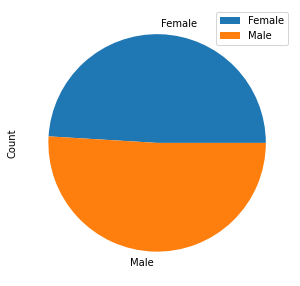

In [281]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Again, what's up with these numbers? How do I get rid of the columns that I don't want besides using <del>?

clean_data_df

mouse_sex=clean_data_df.groupby('Sex').count() 
mouse_sex
print(mouse_sex)

mice_sex = pd.DataFrame({'Count': [922, 958]},
                  index=['Female', 'Male'])
plot = mice_sex.plot.pie(y='Count', figsize=(5, 5))



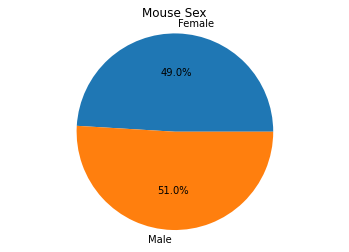

In [282]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


#This is typed in data. How do we get it to pull from another data set?


mouse_sex_pie = [922, 958]
my_labels = 'Female','Male'
plt.pie(mouse_sex_pie,labels=my_labels,autopct='%1.1f%%')
plt.title('Mouse Sex')
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [285]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#this is just for reference to see what the column names are.
final_clean_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [291]:
# Start by getting the last (greatest) timepoint for each mouse


mouse_grouping_timepoints_df=clean_data_df.groupby("Mouse ID").max()["Timepoint"]
mouse_grouping_timepoints_df=pd.DataFrame(mouse_grouping_timepoints_df)
mouse_grouping_timepoints_df.reset_index()



,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [292]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mouse_grouping_timepoints_df

clean_data_df

combined_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how="inner")


mouse_grouping_combined_df=pd.merge(mouse_grouping_timepoints_df, final_clean_data_df, on=["Mouse ID", "Timepoint"], how="left")

mouse_grouping_combined_df

# summary_statistics_df=clean_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"].rename("Mean Tumor Volume")
# summary_statistics_df=pd.DataFrame(summary_statistics_df)
# summary_statistics_df["Median Tumor Volume"]=clean_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [265]:
# #clean_mice_drugs_df.columns=['Mouse ID', 'Drug Regimen']

# clean_mice_drugs_df

,0
0,k403
1,s185
2,x401
3,m601
4,g791
...,...
243,z314
244,z435
245,z581
246,z795


In [293]:
# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# mouse_max_time_tumor_volume=mouse_grouping_combined_df.groupby("Mouse ID").max()["Tumor Volume (mm3)"].rename("Max Tumor Volume")
# mouse_max_time_tumor_volume=pd.DataFrame(mouse_max_time_tumor_volume)
# mouse_max_time_tumor_volume


# mouse_max_time_tumor_volume["Drug Regimen"]=mouse_grouping_combined_df["Drug Regimen"]

# mouse_max_time_tumor_volume

# mouse_max_tumor_drug=pd.merge(mouse_max_time_tumor_volume, clean_mice_drugs_df, on="Mouse ID", how="inner")

# #why doesn't this drop the Drug Regimen_x column? Can I use <del>?

# del mouse_max_tumor_drug["Drug Regimen_x"]

# mouse_max_tumor_drug

#This has lost drug data and returns only Ramicane and Capomulin. Why?

In [308]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


final_volume_regimen_ramicane=mouse_grouping_combined_df.loc[mouse_grouping_combined_df["Drug Regimen"]=='Ramicane']
#final_volume_regimen=mouse_max_tumor_drug.loc[mouse_grouping_combined_df["Drug Regimen"]=='Capomulin']


final_volume_regimen_ramicane=final_volume_regimen_ramicane.reset_index()
del final_volume_regimen_ramicane["index"]

final_volume_regimen_ramicane

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20
5,c758,45,33.397653,1,Ramicane,Male,9,17
6,d251,45,37.311236,2,Ramicane,Female,8,19
7,e662,45,40.659006,2,Ramicane,Male,8,24
8,g791,45,29.128472,1,Ramicane,Male,11,16
9,i177,45,33.562402,3,Ramicane,Male,10,18


In [310]:
final_volume_regimen_capomulin=mouse_grouping_combined_df.loc[mouse_grouping_combined_df["Drug Regimen"]=='Capomulin']

final_volume_regimen_capomulin=final_volume_regimen_capomulin.reset_index()

final_volume_regimen_capomulin

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,19,b128,45,38.982878,2,Capomulin,Female,9,22
1,24,b742,45,38.939633,0,Capomulin,Male,7,21
2,61,f966,20,30.485985,0,Capomulin,Male,16,17
3,64,g288,45,37.074024,1,Capomulin,Male,3,19
4,66,g316,45,40.159220,2,Capomulin,Female,22,22
5,80,i557,45,47.685963,1,Capomulin,Female,1,24
6,83,i738,45,37.311846,2,Capomulin,Female,23,20
7,85,j119,45,38.125164,1,Capomulin,Female,7,23
8,87,j246,35,38.753265,1,Capomulin,Female,21,21
9,108,l509,45,41.483008,3,Capomulin,Male,17,21


In [311]:
final_volume_regimen_infubinol=mouse_grouping_combined_df.loc[mouse_grouping_combined_df["Drug Regimen"]=='Infubinol']

final_volume_regimen_infubinol=final_volume_regimen_infubinol.reset_index()
final_volume_regimen_infubinol

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,a203,45,67.973419,2,Infubinol,Female,20,23
1,1,a251,45,65.525743,1,Infubinol,Female,21,25
2,11,a577,30,57.031862,2,Infubinol,Female,6,25
3,13,a685,45,66.083066,3,Infubinol,Male,8,30
4,27,c139,45,72.226731,2,Infubinol,Male,11,28
5,31,c326,5,36.321346,0,Infubinol,Female,18,25
6,41,c895,30,60.969711,2,Infubinol,Female,7,29
7,50,e476,45,62.435404,1,Infubinol,Male,23,26
8,56,f345,45,60.918767,1,Infubinol,Male,23,26
9,78,i386,40,67.289621,4,Infubinol,Female,23,29


In [312]:
final_volume_regimen_ceftamin=mouse_grouping_combined_df.loc[mouse_grouping_combined_df["Drug Regimen"]=='Ceftamin']

final_volume_regimen_ceftamin=final_volume_regimen_ceftamin.reset_index()

final_volume_regimen_ceftamin

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,3,a275,45,62.999356,3,Ceftamin,Female,20,28
1,21,b447,0,45.000000,0,Ceftamin,Male,2,30
2,22,b487,25,56.057749,1,Ceftamin,Female,6,28
3,25,b759,30,55.742829,1,Ceftamin,Female,12,25
4,58,f436,15,48.722078,2,Ceftamin,Female,3,25
5,75,h531,5,47.784682,0,Ceftamin,Male,5,27
6,88,j296,45,61.849023,3,Ceftamin,Female,24,30
7,94,k210,45,68.923185,3,Ceftamin,Male,15,28
8,106,l471,45,67.748662,1,Ceftamin,Female,7,28
9,107,l490,30,57.918381,3,Ceftamin,Male,24,26


In [377]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]

    
    
    
# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Q1 = mouse_grouping_combined_df['Tumor Volume (mm3)'].quantile(0.25)
# Q3 = mouse_grouping_combined_df['Tumor Volume (mm3)'].quantile(0.75)
# mean= mouse_grouping_combined_df['Tumor Volume (mm3)'].mean()
# mean=mean
# IQR = Q3 - Q1


# print (f"IQR= {IQR}, Q1= {Q1}, Q3={Q3}, mean = {mean}")


for drug in treatments:
    tumor=mouse_grouping_combined_df.loc[mouse_grouping_combined_df["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    tumor_volume.append(tumor)
    
    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq   

    
    print(f"The drug regimen is {drug}")
    print(f"The lower quartile of tumors is: {lowerq}")
    print(f"The upper quartile of tumors is: {upperq}")
    print(f"The interquartile range of tumors is: {iqr}")
    print(f"The the median of tumors is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
      
    outlier_mice = tumor.loc[(tumor < lower_bound) | (tumor > upper_bound)]
    outlier_mice

    print(f"Values for potential outliers are {outlier_mice}")
      
# If the data is in a dataframe, we use pandas to give quartile calculations


# print(f"The lower quartile of tumors is: {lowerq}")
# print(f"The upper quartile of temperatures is: {upperq}")
# print(f"The interquartile range of temperatures is: {iqr}")
# print(f"The the median of temperatures is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

The drug regimen is Capomulin
The lower quartile of tumors is: 32.37735684
The upper quartile of tumors is: 40.1592203
The interquartile range of tumors is: 7.781863460000004
The the median of tumors is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Values for potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
The drug regimen is Ramicane
The lower quartile of tumors is: 31.56046955
The upper quartile of tumors is: 40.65900627
The interquartile range of tumors is: 9.098536719999998
The the median of tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Values for potential outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
The drug regimen is Infubinol
The lower quartile of tumors is: 54.04860769
The upper quartile of tumors is: 65.52574285
The interquartile range of tumors is: 11.477135160000003
The the median of t

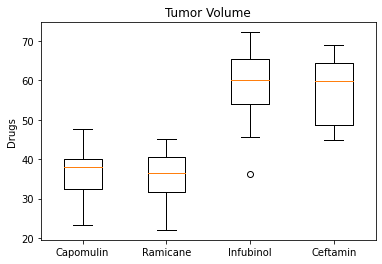

In [381]:

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume')
ax1.set_ylabel('Drugs')
ax1.boxplot(tumor_volume, labels=treatments)
plt.show()

In [378]:
outlier_rows=[(mouse_grouping_combined_df['Tumor Volume (mm3)'] > (Q3+1.5*IQR))
              & 
              (mouse_grouping_combined_df['Tumor Volume (mm3)'] < (Q1-1.5*IQR))]

high_outlier_rows=[(mouse_grouping_combined_df['Tumor Volume (mm3)'] > (Q3+1.5*IQR))]
low_outlier_rows=[(mouse_grouping_combined_df['Tumor Volume (mm3)'] < (Q1-1.5*IQR))]


#low_outlier_rows=pd.DataFrame(low_outlier_rows)

low_outlier_rows

#outlier_rows=pd.DataFrame(outlier_rows)

print(len(high_outlier_rows))
# print (len(low_outlier_rows))
# print (high_outlier_rows)
print(len(outlier_rows))

1
1


In [ ]:
# Computing IQR

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [ ]:
# Example outlier plot of reaction times
times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
fig1, ax1 = plt.subplots()
ax1.set_title('Reaction Times at Baseball Batting Cage')
ax1.set_ylabel('Reaction Time (ms)')
ax1.boxplot(times)
plt.show()



# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
#But you will then call that function each of the variables ...T, RH, Clouds and WInd, I believe

In [382]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


# final_volume_regimen_ceftamin ["Tumor Volume (mm3)"].plot.scatter(x='w', y='h')


## Line and Scatter Plots

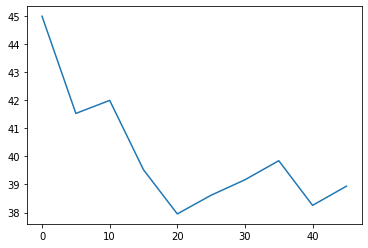

In [390]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin=final_clean_data_df.loc[final_clean_data_df["Drug Regimen"]=='Capomulin']

mouse=capomulin.loc[capomulin["Mouse ID"]=="b742", ["Timepoint", "Tumor Volume (mm3)"]]
                    
#print(mouse)
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])



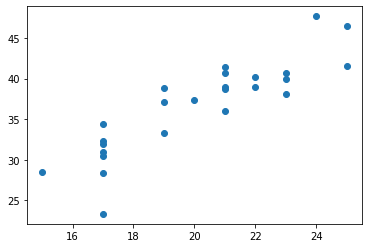

In [403]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mouse_weight=final_volume_regimen_capomulin.groupby(["Mouse ID"])["Weight (g)"].mean()
tumorvolume=final_volume_regimen_capomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

#mouse_weight

plt.scatter(x=mouse_weight, y=tumorvolume)

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


The r-squared is: 0.7686134812139006


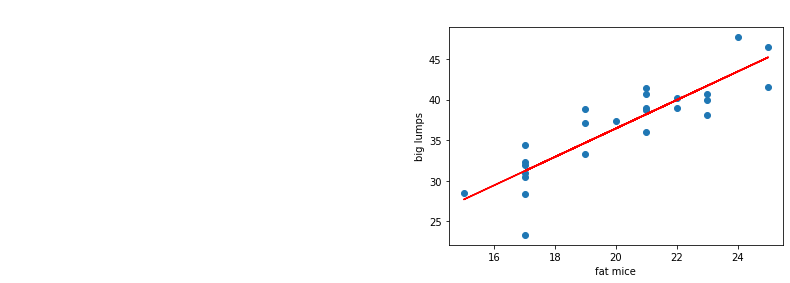

In [406]:
x_values = mouse_weight #weight, average will come from scatterplot and using .mean()
y_values = tumorvolume #tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('fat mice')
plt.ylabel('big lumps')
print(f"The r-squared is: {rvalue**2}")
plt.show()